In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
app=pd.read_csv('/content/drive/MyDrive/Untitled folder/Reunion assignment/applicant.csv')
loan=pd.read_csv('/content/drive/MyDrive/Untitled folder/Reunion assignment/loan.csv')

# 1. Do the Exploratory Data Analysis & share the insights.

In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [ ]:
print(app['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].isna().sum(), app['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].isna().sum())
print(loan['Property'].isna().sum())

#almost half of the values in these columns were null, therefore dropping them 

668 457
154


In [ ]:
app.drop(['Balance_in_existing_bank_account_(lower_limit_of_bucket)'], axis=1,inplace=True)
app.drop(['Balance_in_existing_bank_account_(upper_limit_of_bucket)'], axis=1,inplace=True)

In [ ]:
app.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Savings_account_balance,high_risk_applicant
0,1113817,43,male,divorced/separated,1,own,3,management / self-employed / highly qualified ...,NaN,0 year,Low,0
1,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Low,0
2,1188917,26,male,divorced/separated,1,own,1,skilled employee / official,1 year,4 years,High,0
3,1191977,31,male,divorced/separated,1,own,2,unskilled - resident,1 year,4 years,Low,0
4,1216943,36,male,divorced/separated,1,own,4,skilled employee / official,1 year,4 years,Very high,0


## 2. How would you segment customers based on their risk (of default).

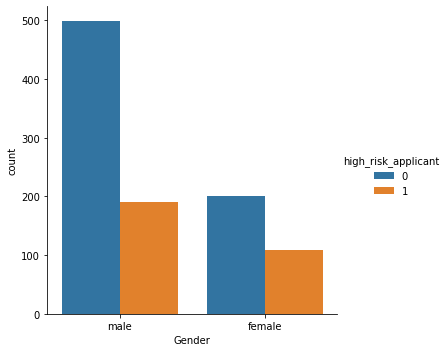

In [ ]:
# when I explored the data I tried by sorting the high_risk_applicant column and found few patterns between gender, employemnet_status, savings and marital_status
# therefore, to visualize I used seaborn to plot catplots

#gender v/s risk
sns.catplot(x='Gender',hue='high_risk_applicant',data=app,kind="count")

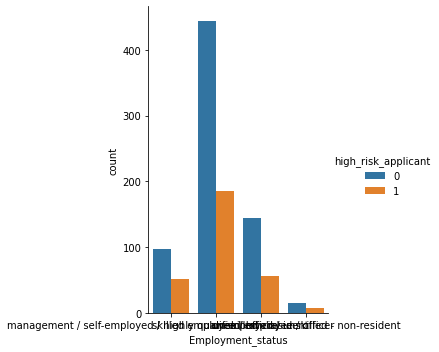

In [ ]:
#employment_status v/s risk
sns.catplot(x='Employment_status',hue='high_risk_applicant',data=app,kind="count")

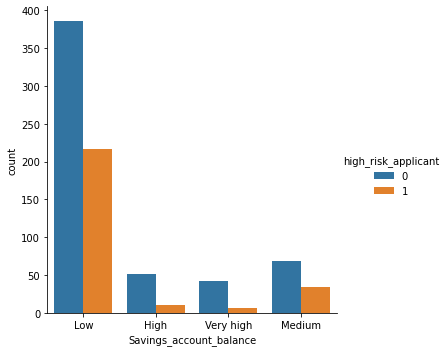

In [ ]:
#Savings v/s risk
sns.catplot(x='Savings_account_balance',hue='high_risk_applicant',data=app,kind="count")

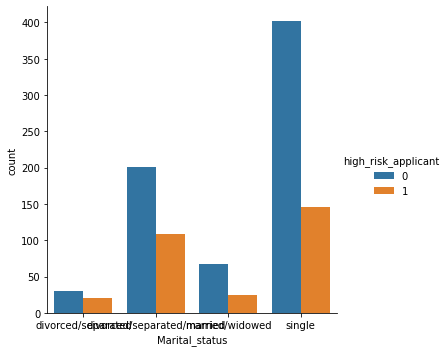

In [ ]:
sns.catplot(x='Marital_status',hue='high_risk_applicant',data=app,kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


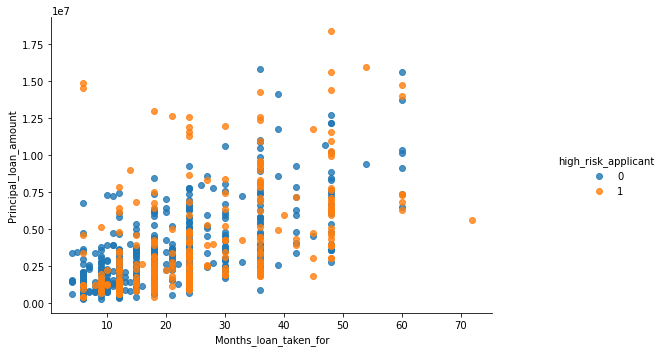

In [ ]:
#relation between amount of loan, time taken for and risk
sns.lmplot('Months_loan_taken_for', 'Principal_loan_amount', loan, hue='high_risk_applicant', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

## 3. Which of these segments / sub-segments would you propose be approved?

After observing these segments I concluded, difference can be seen in gender, savings and employment, hence dropping the amount_taken.
Other than these attributes in loan.csv “Property” can be an important factor as it tells you about the financial strength of the applicant.
A person with more credit-score or more collateral can be creditworthy. Young people can be less creditworthy as their jobs are unstable and don’t own many potential 


## 4. Tell us what your observations were on the data itself (completeness, skews).

The data was sufficient but the size was small, due to which accuracy after a certain level could not be achieved. After splitting the data, the training was performed was only on 800 values.

There could be credit-score as it determines the person’s financial history, the data was vague and the columns had many null values and had to remove.
